In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
flightlist = pd.read_csv('csvs/flightlist_20201101_20201130.csv', low_memory=False)
a_codes = pd.read_csv('airport-codes_csv.csv', low_memory=False)
flightlist = flightlist.dropna()
# flightlist.to_csv("trimmedflights.csv")
flightlist

In [ ]:
mflights = pd.merge(flightlist, a_codes, how="left")
mflights


In [4]:
US_only = pd.read_csv("trimmedflights1019.csv", low_memory=False)
# del US_only["continent"]
# US_only.to_csv("trimmedflights1019.csv")
US_only



,Unnamed: 0,callsign,number,icao24,registration,typecode,origin,destination,firstseen,lastseen,...,ident,type,name,elevation_ft,iso_country,iso_region,municipality,iata_code,local_code,coordinates
0,11,HAL90,HA90,a4470e,N375HA,A332,YSSY,KBOS,2019-09-30 11:46:24+00:00,2019-10-01 09:35:56+00:00,...,KBOS,large_airport,General Edward Lawrence Logan International Ai...,20.0,US,US-MA,Boston,BOS,BOS,"-71.00520325, 42.36429977"
1,15,HAL12,HA12,a45bfa,N380HA,A332,RJTT,KSFO,2019-09-30 12:51:47+00:00,2019-10-01 04:12:17+00:00,...,KSFO,large_airport,San Francisco International Airport,13.0,US,US-CA,San Francisco,SFO,SFO,"-122.375, 37.61899948120117"
2,19,AFR136,AF136,396445,F-GZCF,A332,LFPG,KORD,2019-09-30 13:30:38+00:00,2019-10-01 01:19:58+00:00,...,KORD,large_airport,Chicago O'Hare International Airport,672.0,US,US-IL,Chicago,ORD,ORD,"-87.9048, 41.9786"
3,20,DAL119,DL119,abd2da,N861DA,B772,LFPG,KLAX,2019-09-30 13:35:19+00:00,2019-10-01 00:28:59+00:00,...,KLAX,large_airport,Los Angeles International Airport,125.0,US,US-CA,Los Angeles,LAX,LAX,"-118.407997, 33.942501"
4,23,BAW279,BA279,406f79,G-ZBKM,B789,EGLL,KSJC,2019-09-30 14:05:45+00:00,2019-10-01 00:25:29+00:00,...,KSJC,large_airport,Norman Y. Mineta San Jose International Airport,62.0,US,US-CA,San Jose,SJC,SJC,"-121.929001, 37.362598"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58646,272577,AAL2128,AA2128,ad2cb7,N948UW,E190,KLGA,KBOS,2019-10-31 22:52:19+00:00,2019-10-31 23:44:15+00:00,...,KBOS,large_airport,General Edward Lawrence Logan International Ai...,20.0,US,US-MA,Boston,BOS,BOS,"-71.00520325, 42.36429977"
58647,272581,UAL630,UA630,a5f581,N483UA,A320,KAUS,KIAH,2019-10-31 22:55:55+00:00,2019-10-31 23:25:06+00:00,...,KIAH,large_airport,George Bush Intercontinental Houston Airport,97.0,US,US-TX,Houston,IAH,IAH,"-95.34140014648438, 29.984399795532227"
58648,272584,JSX411,XE411,a25c13,N251JX,E135,KPHX,KLAS,2019-10-31 22:59:21+00:00,2019-10-31 23:44:55+00:00,...,KLAS,large_airport,McCarran International Airport,2181.0,US,US-NV,Las Vegas,LAS,LAS,"-115.1520004, 36.08010101"
58649,272585,SKW5623,OO5623,ad1284,N941SW,CRJ2,KLAX,KMRY,2019-10-31 23:04:48+00:00,2019-10-31 23:44:18+00:00,...,KMRY,medium_airport,Monterey Peninsula Airport,257.0,US,US-CA,Monterey,MRY,MRY,"-121.84300231933594, 36.58700180053711"


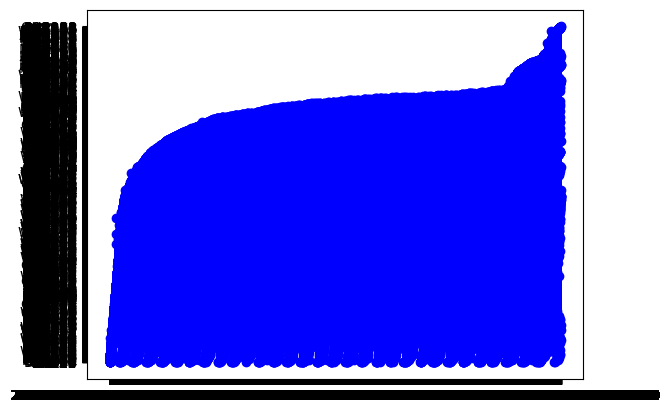

In [5]:
plt.plot(US_only["lastseen"],US_only["number"],marker ='o', color='blue')
plt.show()


In [10]:
import os

flights =[]
names = []


for f in os.listdir('trimmed'):
    print(f)
    temp=pd.read_csv('trimmed/' + f)
    totalflights=len(temp)
    flights.append(totalflights)
    names.append(f)
    
    

trimmedflights419.csv
trimmedflights1219.csv
trimmedflights820.csv
trimmedflights1019.csv
trimmedflights1119.csv
trimmedflights420.csv
trimmedflights920.csv
trimmedflights1120.csv
trimmedflights519.csv
trimmedflights121.csv
trimmedflights119.csv
trimmedflights1020.csv
trimmedflights520.csv
trimmedflights720.csv
trimmedflights1220.csv
trimmedflights619.csv
trimmedflights319.csv
trimmedflights719.csv
trimmedflights320.csv
trimmedflights120.csv
airport-codes_csv.csv
trimmedflights919.csv
trimmedflights219.csv
trimmedflights220.csv
trimmedflights620.csv
trimmedflights819.csv


In [11]:
pd.DataFrame(

            {'flights': flights,
            "names": names})

,flights,names
0,11530,trimmedflights419.csv
1,100787,trimmedflights1219.csv
2,192385,trimmedflights820.csv
3,58651,trimmedflights1019.csv
4,82550,trimmedflights1119.csv
5,71269,trimmedflights420.csv
6,177360,trimmedflights920.csv
7,155478,trimmedflights1120.csv
8,15736,trimmedflights519.csv
9,224824,trimmedflights121.csv
